In [ ]:
!pip install inequality
!pip install geopandas
!pip install mapclassify
!pip install matplotlib==3.4.3
!pip install watermark

  Created wheel for inequality: filename=inequality-1.0.0-py3-none-any.whl size=11799 sha256=59c3b4a7764a5118ddeaedeeb6e42beb5347b07d5b71e2be652de44245ae09b5
  Stored in directory: /root/.cache/pip/wheels/a8/81/7a/af8b9e8ea0b034ac1bdd9d68f3a8ceac179eb5418cdb83c851
Successfully built inequality
     |████████████████████████████████| 1.0 MB 32.2 MB/s 
     |████████████████████████████████| 6.3 MB 47.4 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 
     |████████████████████████████████| 10.3 MB 29.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.8.1
    Uninstalling importlib-metadata-4.8.1:
      Successfully uninstalled importlib-metadata-4.8.1


In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

## Transformação da base de Rendimentos
- Leitura feita
- Transformação de dados faltantes
- Adição de sufixos (aprovação, reprovação, abandono)

### Município

In [ ]:
from glob import glob

def read_taxa_rendimento(str):
  rendimento = pd.read_excel(str, header=7, usecols="A:BI")

  rendimento = rendimento.rename({"Unnamed: 0": "Ano", "Unnamed: 1": "Região", "Unnamed: 2": "UF", "Unnamed: 3": "Código Município", 
                                "Unnamed: 4": "Nome Município", "Unnamed: 5": "Localização", 
                                "Unnamed: 6": "Dependência Administrativa"}, axis=1) 
  rendimento = rendimento[1:65662].reset_index(drop=True)
  rendimento = rendimento.apply(lambda row: row.replace('--', np.nan))
  list_indexes = [(7, 24, 'aprovacao'), (25, 42, 'reprovacao'), (42, 59, 'abandono')]
  columns = rendimento.columns
  for suffix in list_indexes:
    col = columns[suffix[0]: suffix[1]+1]
    new_names = [(x, x.rstrip()+f"_{suffix[2]}") for x in col]
    rendimento.rename(dict(new_names), axis=1, inplace=True)
  
  return rendimento

path = "/content/drive/MyDrive/datasets/CCF425/trabalho/rendimentos/*.xlsx"
data = glob(path)
print(data)
rendimentos = []
for file in data:
   rendimentos.append(read_taxa_rendimento(file))

rendimento_df = pd.concat(rendimentos)


['/content/drive/MyDrive/datasets/CCF425/trabalho/rendimentos/TX_REND_MUNICIPIOS_2016.xlsx', '/content/drive/MyDrive/datasets/CCF425/trabalho/rendimentos/TX_REND_MUNICIPIOS_2017.xlsx', '/content/drive/MyDrive/datasets/CCF425/trabalho/rendimentos/TX_REND_MUNICIPIOS_2018.xlsx', '/content/drive/MyDrive/datasets/CCF425/trabalho/rendimentos/tx_rend_municipios_2019.xlsx', '/content/drive/MyDrive/datasets/CCF425/trabalho/rendimentos/tx_rend_municipios_2020.xlsx']


In [ ]:
rendimento_df.to_csv('/content/drive/MyDrive/datasets/CCF425/trabalho/rendimentos/rendimentos.csv')

In [ ]:
rendimento.columns

Index(['Ano', 'Região', 'UF', 'Código Município', 'Nome Município',
       'Localização', 'Dependência Administrativa', 'Total_aprovacao',
       'Anos Iniciais_aprovacao', 'Anos Finais_aprovacao', '1º Ano_aprovacao',
       '2º Ano_aprovacao', '3º Ano_aprovacao', '4º Ano_aprovacao',
       ' 5º Ano_aprovacao', '6º Ano_aprovacao', '7º Ano_aprovacao',
       '8º Ano_aprovacao', '9º Ano_aprovacao', 'Total_aprovacao',
       '1ª série_aprovacao', '2ª série_aprovacao', '3ª série_aprovacao',
       '4ª série_aprovacao', 'Não-Seriado_aprovacao', 'Total.1_reprovacao',
       'Anos Iniciais.1_reprovacao', 'Anos Finais.1_reprovacao',
       '1º Ano .1_reprovacao', '2º Ano.1_reprovacao', '3º Ano.1_reprovacao',
       '4º Ano.1_reprovacao', ' 5º Ano.1_reprovacao', '6º Ano.1_reprovacao',
       '7º Ano.1_reprovacao', '8º Ano.1_reprovacao', '9º Ano.1_reprovacao',
       'Total  .1_reprovacao', '1ª série.1_reprovacao',
       '2ª série.1_reprovacao', '3ª série.1_reprovacao',
       '4ª série.1_repro

### UF

In [ ]:
rendimento = pd.read_excel('/content/drive/MyDrive/datasets/CCF425/trabalho/tx_rend_brasil_regioes_ufs_2020.xlsx', header=7, usecols="A:BF")
rendimento = rendimento.rename({"Unnamed: 0": "Ano", "Unnamed: 1": "Unidade Geográfica", "Unnamed: 2": "Localização", "Unnamed: 3": "Dependência Administrativa"}, axis=1) 
rendimento = rendimento[1:587].reset_index(drop=True)

In [ ]:
rendimento.columns

Index(['Ano', 'Unidade Geográfica', 'Localização',
       'Dependência Administrativa', 'Total', 'Anos Iniciais', 'Anos Finais',
       '1º Ano ', '2º Ano', '3º Ano', '4º Ano', '5º Ano', '6º Ano', '7º Ano',
       '8º Ano', '9º Ano', 'Total  ', '1ª série', '2ª série', '3ª série',
       '4ª série', 'Não-Seriado', 'Total.1', 'Anos Iniciais.1',
       'Anos Finais.1', '1º Ano .1', '2º Ano.1', '3º Ano.1', '4º Ano.1',
       '5º Ano.1', '6º Ano.1', '7º Ano.1', '8º Ano.1', '9º Ano.1', 'Total  .1',
       '1ª série.1', '2ª série.1', '3ª série.1', '4ª série.1', 'Não-Seriado.1',
       'Total.2', 'Anos Iniciais.2', 'Anos Finais.2', '1º Ano .2', '2º Ano.2',
       '3º Ano.2', '4º Ano.2', '5º Ano.2', '6º Ano.2', '7º Ano.2', '8º Ano.2',
       '9º Ano.2', 'Total  .2', '1ª série.2', '2ª série.2', '3ª série.2',
       '4ª série.2', 'Não-Seriado.2'],
      dtype='object')

In [ ]:
str_columns = ['Unidade Geográfica', 'Localização',	'Dependência Administrativa']
float_columns = list(rendimento.columns)
float_columns.remove(str_columns[0])
float_columns.remove(str_columns[1])
float_columns.remove(str_columns[2])
rendimento[float_columns] = rendimento[float_columns].apply(lambda row: row.astype('float32'))

In [ ]:
len(rendimento.columns)

58

In [ ]:
list_indexes = [(4, 21, 'aprovacao'), (22, 39, 'reprovacao'), (40, 57, 'abandono')]
columns = rendimento.columns
for suffix in list_indexes:
  col = columns[suffix[0]: suffix[1]+1]
  new_names = [(x, x.rstrip()+f"_{suffix[2]}") for x in col]
  rendimento.rename(dict(new_names), axis=1, inplace=True)

In [ ]:
rendimento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Ano                         586 non-null    float32
 1   Unidade Geográfica          586 non-null    object 
 2   Localização                 586 non-null    object 
 3   Dependência Administrativa  586 non-null    object 
 4   Total_aprovacao             539 non-null    float32
 5   Anos Iniciais_aprovacao     515 non-null    float32
 6   Anos Finais_aprovacao       537 non-null    float32
 7   1º Ano_aprovacao            510 non-null    float32
 8   2º Ano_aprovacao            514 non-null    float32
 9   3º Ano_aprovacao            514 non-null    float32
 10  4º Ano_aprovacao            514 non-null    float32
 11  5º Ano_aprovacao            515 non-null    float32
 12  6º Ano_aprovacao            536 non-null    float32
 13  7º Ano_aprovacao            537 non

In [ ]:
rendimento['Unidade Geográfica'].unique()

array(['Brasil', 'Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste',
       'Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

### Escolas

In [ ]:
def read_taxa_rendimento(str):
  rendimento = pd.read_excel(str, header=7, usecols="A:BK")

  rendimento = rendimento.rename({"Unnamed: 0": "Ano", "Unnamed: 1": "Região", "Unnamed: 2": "UF", "Unnamed: 3": "Código Município", 
                                "Unnamed: 4": "Nome Município", "Unnamed: 5": "CO_ENTIDADE", "Unnamed: 6": "NO_ENTIDADE", 
                                "Unnamed: 7": "Localização", "Unnamed: 8": "Dependência Administrativa"}, axis=1) 
  rendimento = rendimento[1:131229].reset_index(drop=True)
  rendimento = rendimento.apply(lambda row: row.replace('--', np.nan))
  list_indexes = [(9, 26, 'aprovacao'), (26, 44, 'reprovacao'), (44, 61, 'abandono')]
  columns = rendimento.columns
  for suffix in list_indexes:
    col = columns[suffix[0]: suffix[1]+1]
    new_names = [(x, x.rstrip()+f"_{suffix[2]}") for x in col]
    rendimento.rename(dict(new_names), axis=1, inplace=True)
  
  return rendimento

In [ ]:
rendimento = read_taxa_rendimento('/content/drive/MyDrive/datasets/CCF425/trabalho/tx_rend_escolas_2020.xlsx')

In [ ]:
rendimento.to_csv('/content/drive/MyDrive/datasets/CCF425/trabalho/rendimentos/rendimentos_escolas.csv')

# Mesorregioes

In [ ]:
municipios = gpd.read_file('/content/drive/MyDrive/datasets/CCF425/trabalho/municipios/BR_Municipios_2020.shp')
mesorregioes = gpd.read_file('/content/drive/MyDrive/datasets/CCF425/trabalho/mesorregioes/BR_Mesorregioes_2020.shp')
municipios_meta = pd.read_csv('/content/drive/MyDrive/datasets/CCF425/trabalho/municipios.csv')
densidade_mesorregiao = pd.read_csv('/content/drive/MyDrive/datasets/CCF425/trabalho/densidade_mesorregiao.csv')
densidade_municipios = pd.read_csv('/content/drive/MyDrive/datasets/CCF425/trabalho/densidade_municipio.csv')
pib_mesorregiao = pd.read_csv('/content/drive/MyDrive/datasets/CCF425/trabalho/pib_mesorregiao.csv')
pib_municipios = pd.read_csv('/content/drive/MyDrive/datasets/CCF425/trabalho/pib_municipio.csv')

In [ ]:
municipios['CD_MUN'] = municipios['CD_MUN'].astype('int64')
mesorregioes['CD_MESO'] = mesorregioes['CD_MESO'].astype('int64')

In [ ]:
municipios = municipios.merge(municipios_meta, right_on="id", left_on='CD_MUN').rename({'geometry': 'municipio_polygon'}, axis=1)
pib_municipios = pib_municipios.merge(densidade_municipios)
municipios = municipios.merge(pib_municipios, right_on='id_municipio', left_on='CD_MUN').rename({'pib': 'pib_municipio'}, axis=1)
municipios = municipios.merge(mesorregioes[['CD_MESO', 'geometry']], left_on="mesorregiao_id", right_on='CD_MESO').rename({'geometry': 'mesorregiao_polygon'}, axis=1)

In [ ]:
area_mesorregiao = municipios.groupby('CD_MESO')['AREA_KM2'].sum().reset_index()
mesorregioes_meta = densidade_mesorregiao.merge(pib_mesorregiao)
mesorregioes_meta = mesorregioes_meta.merge(area_mesorregiao, left_on='id_mesorregiao', right_on='CD_MESO')

- Densidade = população/área
- população = área*densidade

In [ ]:
mesorregioes_meta['populacao_2010'] = mesorregioes_meta['densidade']*mesorregioes_meta['AREA_KM2']
municipios['populacao_2010'] = municipios['densidade']*municipios['AREA_KM2'] 
mesorregioes_meta['pib_per_capita_2018_pop_2010'] = mesorregioes_meta['pib']/mesorregioes_meta['populacao_2010']

In [ ]:
municipios = municipios.merge(mesorregioes_meta, right_on="CD_MESO", left_on='mesorregiao_id', suffixes=('_mun', '_meso'))
municipios = municipios.drop(['CD_MESO_mun', 'CD_MESO_meso'], axis=1).rename({'pib': 'pib_meso'}, axis=1)

In [ ]:
municipios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1668 entries, 0 to 1667
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   CD_MUN                        1668 non-null   int64   
 1   NM_MUN                        1668 non-null   object  
 2   SIGLA_UF                      1668 non-null   object  
 3   AREA_KM2_mun                  1668 non-null   float64 
 4   municipio_polygon             1668 non-null   geometry
 5   id                            1668 non-null   int64   
 6   nome                          1668 non-null   object  
 7   microrregiao_id               1668 non-null   int64   
 8   microrregiao_nome             1668 non-null   object  
 9   mesorregiao_id                1668 non-null   int64   
 10  mesorregiao_nome              1668 non-null   object  
 11  UF                            1668 non-null   object  
 12  UF_nome                       1668 non-null   ob

#### Cálculo GINI

In [ ]:
municipios['proporcao_populacao'] = (municipios['populacao_2010_mun']/municipios['populacao_2010_meso'])
municipios['proporcao_pib'] = (municipios['pib_municipio']/municipios['pib_meso'])

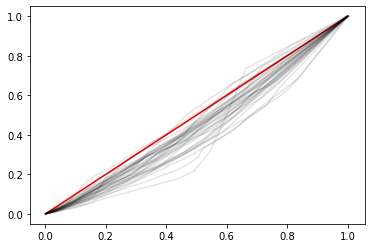

In [ ]:
def lorenz(meso):
    df = municipios[municipios['id_mesorregiao']==meso].copy()

    inc = np.asarray(df['proporcao_pib'])
    inc = np.sort(inc)
    income_shares = inc.cumsum()
    
    pop = np.asarray(df['proporcao_populacao'])
    pop = np.sort(pop)
    pop_shares = pop.cumsum()
    return pop_shares, income_shares

f, ax = plt.subplots()
ax.plot((0,1),(0,1), color='r')
mesorregioes = municipios['id_mesorregiao'].unique()
mesorregioes_gini = []
for meso in mesorregioes:
  meso_pop_shares, meso_inc_shares = lorenz(meso)

  mesorregioes_gini.append({'id': meso, 'pop_shares': meso_pop_shares, 'meso_shares': meso_inc_shares})
  
  ax.plot(meso_pop_shares, meso_inc_shares, color='k', alpha=.1)
mesorregioes_gini = pd.DataFrame.from_dict(mesorregioes_gini)

In [ ]:
mesorregioes_gini = mesorregioes_gini.set_index('id').T

In [ ]:
mesorregioes_gini

id,3105,3106,3112,3108,3109,3104,3102,3110,3111,3103,3107,3101,3203,3201,3204,3202,3305,3301,3304,3303,3306,3302,3508,3501,3507,3504,3506,3511,3502,3503,3512,3509,3505,3513,3515,3510,3514
pop_shares,"[0.0006402681105898468, 0.0014980367187057185,...","[0.0019763538724564024, 0.0049065597256795854,...","[0.0007169402990127244, 0.0014858678035369753,...","[0.0015089083560950486, 0.003353613805474255, ...","[0.0015082449221665022, 0.0034687459976669526,...","[0.0070238930912830165, 0.018690650619661103, ...","[0.0018400121869261426, 0.004127609966656109, ...","[0.000730549251331788, 0.0014642559677635815, ...","[0.0040299991894553, 0.008771294009803626, 0.0...","[0.004230723563124983, 0.00859995800952736, 0....","[0.00025861846359326, 0.0005417876667321526, 0...","[0.008818791928309038, 0.01775814528595259, 0....","[0.005414401247648005, 0.010889208311350082, 0...","[0.017696206694132747, 0.037000856564263135, 0...","[0.00790370317607726, 0.019266200677191085, 0....","[0.01034566842160366, 0.023211608065730485, 0....","[0.008083808277442258, 0.02009830761868801, 0....","[0.02201067621618082, 0.04593359619409386, 0.0...","[0.030514014125018026, 0.06256084083334779, 0....","[0.011060955961245783, 0.02836963186586705, 0....","[0.0011020923256732662, 0.002501230533527971, ...","[0.014784527973166461, 0.03035471074536892, 0....","[0.002060790016658602, 0.004537975726714702, 0...","[0.0007176697404750079, 0.0016377683720781191,...","[0.00152703989199582, 0.003097040777056526, 0....","[0.0008604420887462004, 0.002082361035667872, ...","[0.0013220638111836758, 0.0033536314224851165,...","[0.002731009418122599, 0.006507170364959531, 0...","[0.0008218032414171829, 0.0019300839493440834,...","[0.0027756871789403528, 0.00584041565906915, 0...","[0.0022424696525276577, 0.005271598268404865, ...","[0.003541532710090765, 0.007916945578374739, 0...","[0.0019045265693243534, 0.007194650623725335, ...","[0.0011018766332024212, 0.0027344461866998116,...","[0.0006603649537694793, 0.0013991085478574042,...","[0.001460100661814096, 0.005573561683710343, 0...","[0.016686910466481374, 0.03701526993782457, 0...."
meso_shares,"[0.0002786787289650471, 0.0007752779968482563,...","[0.0015294933129198288, 0.003115631399709246, ...","[0.0004657340724378802, 0.0009521688323792911,...","[0.0007863222065376996, 0.001583424237687653, ...","[0.001434233240814562, 0.002930326139295501, 0...","[0.005616926969998622, 0.012409922079853225, 0...","[0.0011557182127564557, 0.0024306143980152477,...","[0.00029023563219642023, 0.0006068784423299634...","[0.002462195251883653, 0.005033412880770043, 0...","[0.003550723465435328, 0.0078096958826520966, ...","[7.98225716373311e-05, 0.00016041798717045778,...","[0.0034005269967065676, 0.007099849726378513, ...","[0.001570966196652104, 0.00390671815838514, 0....","[0.009466290459158389, 0.024604488259741826, 0...","[0.0024194339426550082, 0.006386470708786547, ...","[0.0038172554649171684, 0.00830912554925931, 0...","[0.0037610581859226066, 0.00861509364890899, 0...","[0.01769814966265897, 0.041290308320211994, 0....","[0.013463742003406939, 0.02760806787786947, 0....","[0.009985001417096719, 0.02178900067484514, 0....","[0.00044411796800191853, 0.000993040060936746,...","[0.00463425858665475, 0.010526698112036692, 0....","[0.001268740312775318, 0.002600604863434123, 0...","[0.0006050919097559367, 0.0012261524664594486,...","[0.0003531442449188412, 0.0008795622485925603,...","[0.0007634008684783267, 0.0015318362108416857,...","[0.0013303236913679865, 0.002973620947605605, ...","[0.001198050734545754, 0.0028459540579763984, ...","[0.00038587499797432403, 0.0009030258180591022...","[0.0017447758996816595, 0.0035759018251615873,...","[0.0007769866801609986, 0.001579416649834106, ...","[0.0032652354856204883, 0.006539830885333983, ...","[0.0011710916251465341, 0.003523626015222634, ...","[0.0002467764266657682, 0.0005934079316566896,...","[0.00016335595153123945, 0.0003316564868673193...","[0.0023994514230039044, 0.005756740893022192

In [ ]:
import inequality
def gini_by_col(column):
    return inequality.gini.Gini(column['meso_shares']).g
inequalities = mesorregioes_gini[mesorregioes].apply(gini_by_col, axis=0).to_frame('gini')

In [ ]:
municipios = municipios.merge(inequalities.reset_index(), right_on="id", left_on='mesorregiao_id')

In [ ]:
municipios.to_csv('/content/drive/MyDrive/datasets/CCF425/trabalho/municipios_tratado.csv')

### Visualização

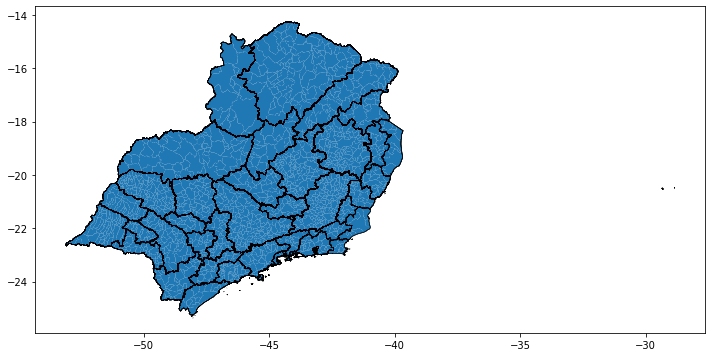

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
municipios['mesorregiao_polygon'].plot(ax=ax, edgecolor='black', alpha=0.3, zorder=2, facecolor='None', linewidth=0.5)
municipios['municipio_polygon'].plot(ax=ax, zorder=1)

#### Visualização Pib

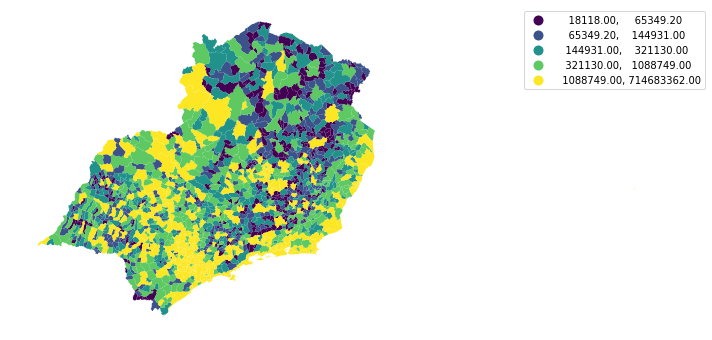

In [ ]:
municipios = gpd.GeoDataFrame(municipios, geometry='municipio_polygon')
ax = municipios.plot(
    column='pib_municipio', 
    scheme='Quantiles', 
    legend=True, 
    edgecolor='none',
    legend_kwds={'loc': 'best', 'bbox_to_anchor': (1.05, 1)}, 
    figsize=(12, 12)
)
ax.set_axis_off()
plt.show()

### Visualização Gini

In [ ]:
meso = municipios[['mesorregiao_polygon', 'id_mesorregiao', 'gini']].drop_duplicates()

In [ ]:
meso

,mesorregiao_polygon,id_mesorregiao,gini
0,"POLYGON ((-44.83849 -19.73535, -44.83915 -19.7...",3107,0.736757
105,"MULTIPOLYGON (((-46.16241 -24.33113, -46.16298...",3515,0.653646
150,"MULTIPOLYGON (((-45.66298 -24.08365, -45.66318...",3513,0.750351
189,"POLYGON ((-47.67975 -18.35609, -47.67936 -18.3...",3105,0.616253
255,"POLYGON ((-47.14786 -21.03546, -47.14806 -21.0...",3110,0.579290
401,"POLYGON ((-47.19749 -22.09872, -47.23234 -22.0...",3507,0.656309
450,"POLYGON ((-47.86981 -20.07615, -47.86960 -20.0...",3502,0.600747
516,"MULTIPOLYGON (((-43.83480 -23.11577, -43.83492...",3306,0.702582
546,"POLYGON ((-43.05971 -20.18932, -43.05949 -20.1...",3112,0.557202
688,"POLYGON ((-50.81212 -20.53115, -50.81288 -20.5...",3501,0.568781


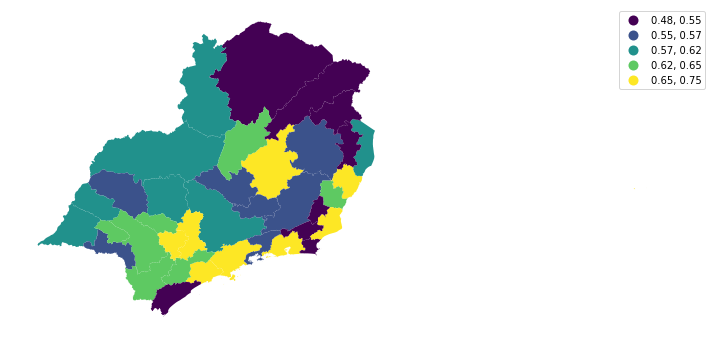

In [ ]:
meso = gpd.GeoDataFrame(meso, geometry='mesorregiao_polygon')
ax = meso.plot(
    column='gini', 
    scheme='Quantiles', 
    legend=True, 
    edgecolor='none',
    legend_kwds={'loc': 'best', 'bbox_to_anchor': (1.05, 1)}, 
    figsize=(12, 12)
)
ax.set_axis_off()
plt.show()

## Base de Escolas

In [ ]:
escolas = pd.read_csv('/content/drive/MyDrive/datasets/CCF425/trabalho/escolas.CSV', sep='|', encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Limpeza

In [ ]:
meta_columns = ['CO_ENTIDADE', 'NO_ENTIDADE', 'TP_SITUACAO_FUNCIONAMENTO', 'CO_REGIAO', 'CO_MESORREGIAO', 'CO_MICRORREGIAO',
                'CO_UF', 'CO_MUNICIPIO', 'CO_DISTRITO']

agua_columns = ['IN_AGUA_POTAVEL', 'IN_AGUA_REDE_PUBLICA', 'IN_AGUA_POCO_ARTESIANO', 'IN_AGUA_CACIMBA',
           'IN_AGUA_FONTE_RIO']
esgoto_columns = ['IN_ENERGIA_REDE_PUBLICA', 'IN_ENERGIA_GERADOR_FOSSIL', 'IN_ENERGIA_RENOVAVEL', 'IN_ESGOTO_FOSSA_SEPTICA', 'IN_ESGOTO_FOSSA_COMUM', 
           'IN_ESGOTO_FOSSA']
banheiro_columns = ['IN_BANHEIRO', 'IN_BANHEIRO_EI', 'IN_BANHEIRO_PNE', 'IN_BANHEIRO_FUNCIONARIOS',
           'IN_BANHEIRO_CHUVEIRO']
patio_columns = ['IN_PATIO_COBERTO', 'IN_PATIO_DESCOBERTO']

infra_columns = ['IN_ALMOXARIFADO', 'IN_AREA_VERDE', 'IN_AUDITORIO', 'IN_BIBLIOTECA', 'IN_BIBLIOTECA_SALA_LEITURA', 'IN_COZINHA', 'IN_DESPENSA', 'IN_LABORATORIO_CIENCIAS', 
           'IN_LABORATORIO_INFORMATICA', 'IN_PARQUE_INFANTIL', 'IN_PISCINA', 'IN_QUADRA_ESPORTES',
           'IN_REFEITORIO', 'IN_SALA_ATELIE_ARTES', 'IN_SALA_MUSICA_CORAL', 'IN_SALA_ESTUDIO_DANCA', 'IN_SALA_MULTIUSO',
           'IN_SALA_DIRETORIA', 'IN_SALA_LEITURA', 'IN_SALA_PROFESSOR', 'IN_SECRETARIA', 'IN_COMPUTADOR', 'IN_EQUIP_IMPRESSORA', 'IN_EQUIP_DVD', 'IN_EQUIP_TV',
           'IN_EQUIP_MULTIMIDIA', 'IN_DESKTOP_ALUNO', 'IN_COMP_PORTATIL_ALUNO', 'IN_TABLET_ALUNO', 'IN_INTERNET']
           
columns = meta_columns + agua_columns + esgoto_columns + banheiro_columns + patio_columns + infra_columns

In [ ]:
escolas = escolas[escolas['TP_SITUACAO_FUNCIONAMENTO']==1][columns]

In [ ]:
def attr_exist(df, columns, column_name):
  df[column_name] = df[columns].max().max()
  return df

agua = 'IN_ABASTECIMENTO_AGUA'
energia = 'IN_ABASTECIMENTO_ENERGIA'
banheiro = 'IN_BANHEIRO'
patio = 'IN_PATIO'

escolas = attr_exist(escolas, agua_columns, agua)
escolas = attr_exist(escolas, esgoto_columns, energia)
escolas = attr_exist(escolas, banheiro_columns, banheiro)
escolas = attr_exist(escolas, patio_columns, patio)

columns_selected = meta_columns + [agua, energia, banheiro, patio] + infra_columns

escolas = escolas[columns_selected]

In [ ]:
escolas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181279 entries, 0 to 224226
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CO_ENTIDADE                 181279 non-null  int64  
 1   NO_ENTIDADE                 181279 non-null  object 
 2   TP_SITUACAO_FUNCIONAMENTO   181279 non-null  int64  
 3   CO_REGIAO                   181279 non-null  int64  
 4   CO_MESORREGIAO              181279 non-null  int64  
 5   CO_MICRORREGIAO             181279 non-null  int64  
 6   CO_UF                       181279 non-null  int64  
 7   CO_MUNICIPIO                181279 non-null  int64  
 8   CO_DISTRITO                 181279 non-null  int64  
 9   IN_ABASTECIMENTO_AGUA       181279 non-null  float64
 10  IN_ABASTECIMENTO_ENERGIA    181279 non-null  float64
 11  IN_BANHEIRO                 181279 non-null  float64
 12  IN_PATIO                    181279 non-null  float64
 13  IN_ALMOXARIFAD

### Análise

In [ ]:
municipios = pd.read_csv('/content/drive/MyDrive/datasets/CCF425/trabalho/municipios_tratado.csv')
rendimentos = pd.read_csv('/content/drive/MyDrive/datasets/CCF425/trabalho/rendimentos/rendimentos.csv', index_col=0)

cod_mesorregioes_sudeste = municipios.mesorregiao_id.unique()
escolas = escolas[escolas['CO_MESORREGIAO'].isin(cod_mesorregioes_sudeste)]

rendimentos['Código Município'] = rendimentos['Código Município'].astype('int64')
rendimentos = rendimentos.merge(municipios[['CD_MUN', 'mesorregiao_id']], right_on='CD_MUN', left_on='Código Município')
rendimentos = rendimentos[(rendimentos['mesorregiao_id'].isin(cod_mesorregioes_sudeste)) & (rendimentos['Ano']==2020)]

In [ ]:
rendimentos_mesorregiao = rendimentos[rendimentos['Localização']=='Total'].groupby(['mesorregiao_id']).mean()

In [ ]:
escolas_metrics = escolas.groupby('CO_MESORREGIAO').mean()
escolas_metrics = escolas_metrics[[agua, energia, banheiro, patio] + infra_columns]

In [ ]:
qtd_escolas_mesorregiao = escolas.groupby('CO_MESORREGIAO').count()['NO_ENTIDADE'].reset_index().rename({'NO_ENTIDADE': 'qtd_escolas'}, axis=1)

In [ ]:
mesorregioes_meta = mesorregioes_meta.merge(qtd_escolas_mesorregiao, right_on='CO_MESORREGIAO', left_on='CD_MESO')

In [ ]:
mesorregioes_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_mesorregiao                37 non-null     int64  
 1   densidade                     37 non-null     float64
 2   pib                           37 non-null     int64  
 3   CD_MESO                       37 non-null     int64  
 4   AREA_KM2                      37 non-null     float64
 5   populacao_2010                37 non-null     float64
 6   pib_per_capita_2018_pop_2010  37 non-null     float64
 7   CO_MESORREGIAO                37 non-null     int64  
 8   qtd_escolas                   37 non-null     int64  
dtypes: float64(4), int64(5)
memory usage: 2.9 KB


In [ ]:
rendimentos_mesorregiao = rendimentos_mesorregiao.merge(mesorregioes_meta[['id_mesorregiao', 'pib_per_capita_2018_pop_2010', 'qtd_escolas', 'AREA_KM2', 'densidade']], left_on='mesorregiao_id', right_on='id_mesorregiao')

# Análise dos dados

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
rendimentos_mesorregiao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 110
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ano                           111 non-null    float64
 1   Código Município              111 non-null    float64
 2   Total_aprovacao               111 non-null    float64
 3   Anos Iniciais_aprovacao       111 non-null    float64
 4   Anos Finais_aprovacao         111 non-null    float64
 5   1º Ano_aprovacao              111 non-null    float64
 6   2º Ano_aprovacao              111 non-null    float64
 7   3º Ano_aprovacao              111 non-null    float64
 8   4º Ano_aprovacao              111 non-null    float64
 9    5º Ano_aprovacao             111 non-null    float64
 10  6º Ano_aprovacao              111 non-null    float64
 11  7º Ano_aprovacao              111 non-null    float64
 12  8º Ano_aprovacao              111 non-null    float64
 13  9º An

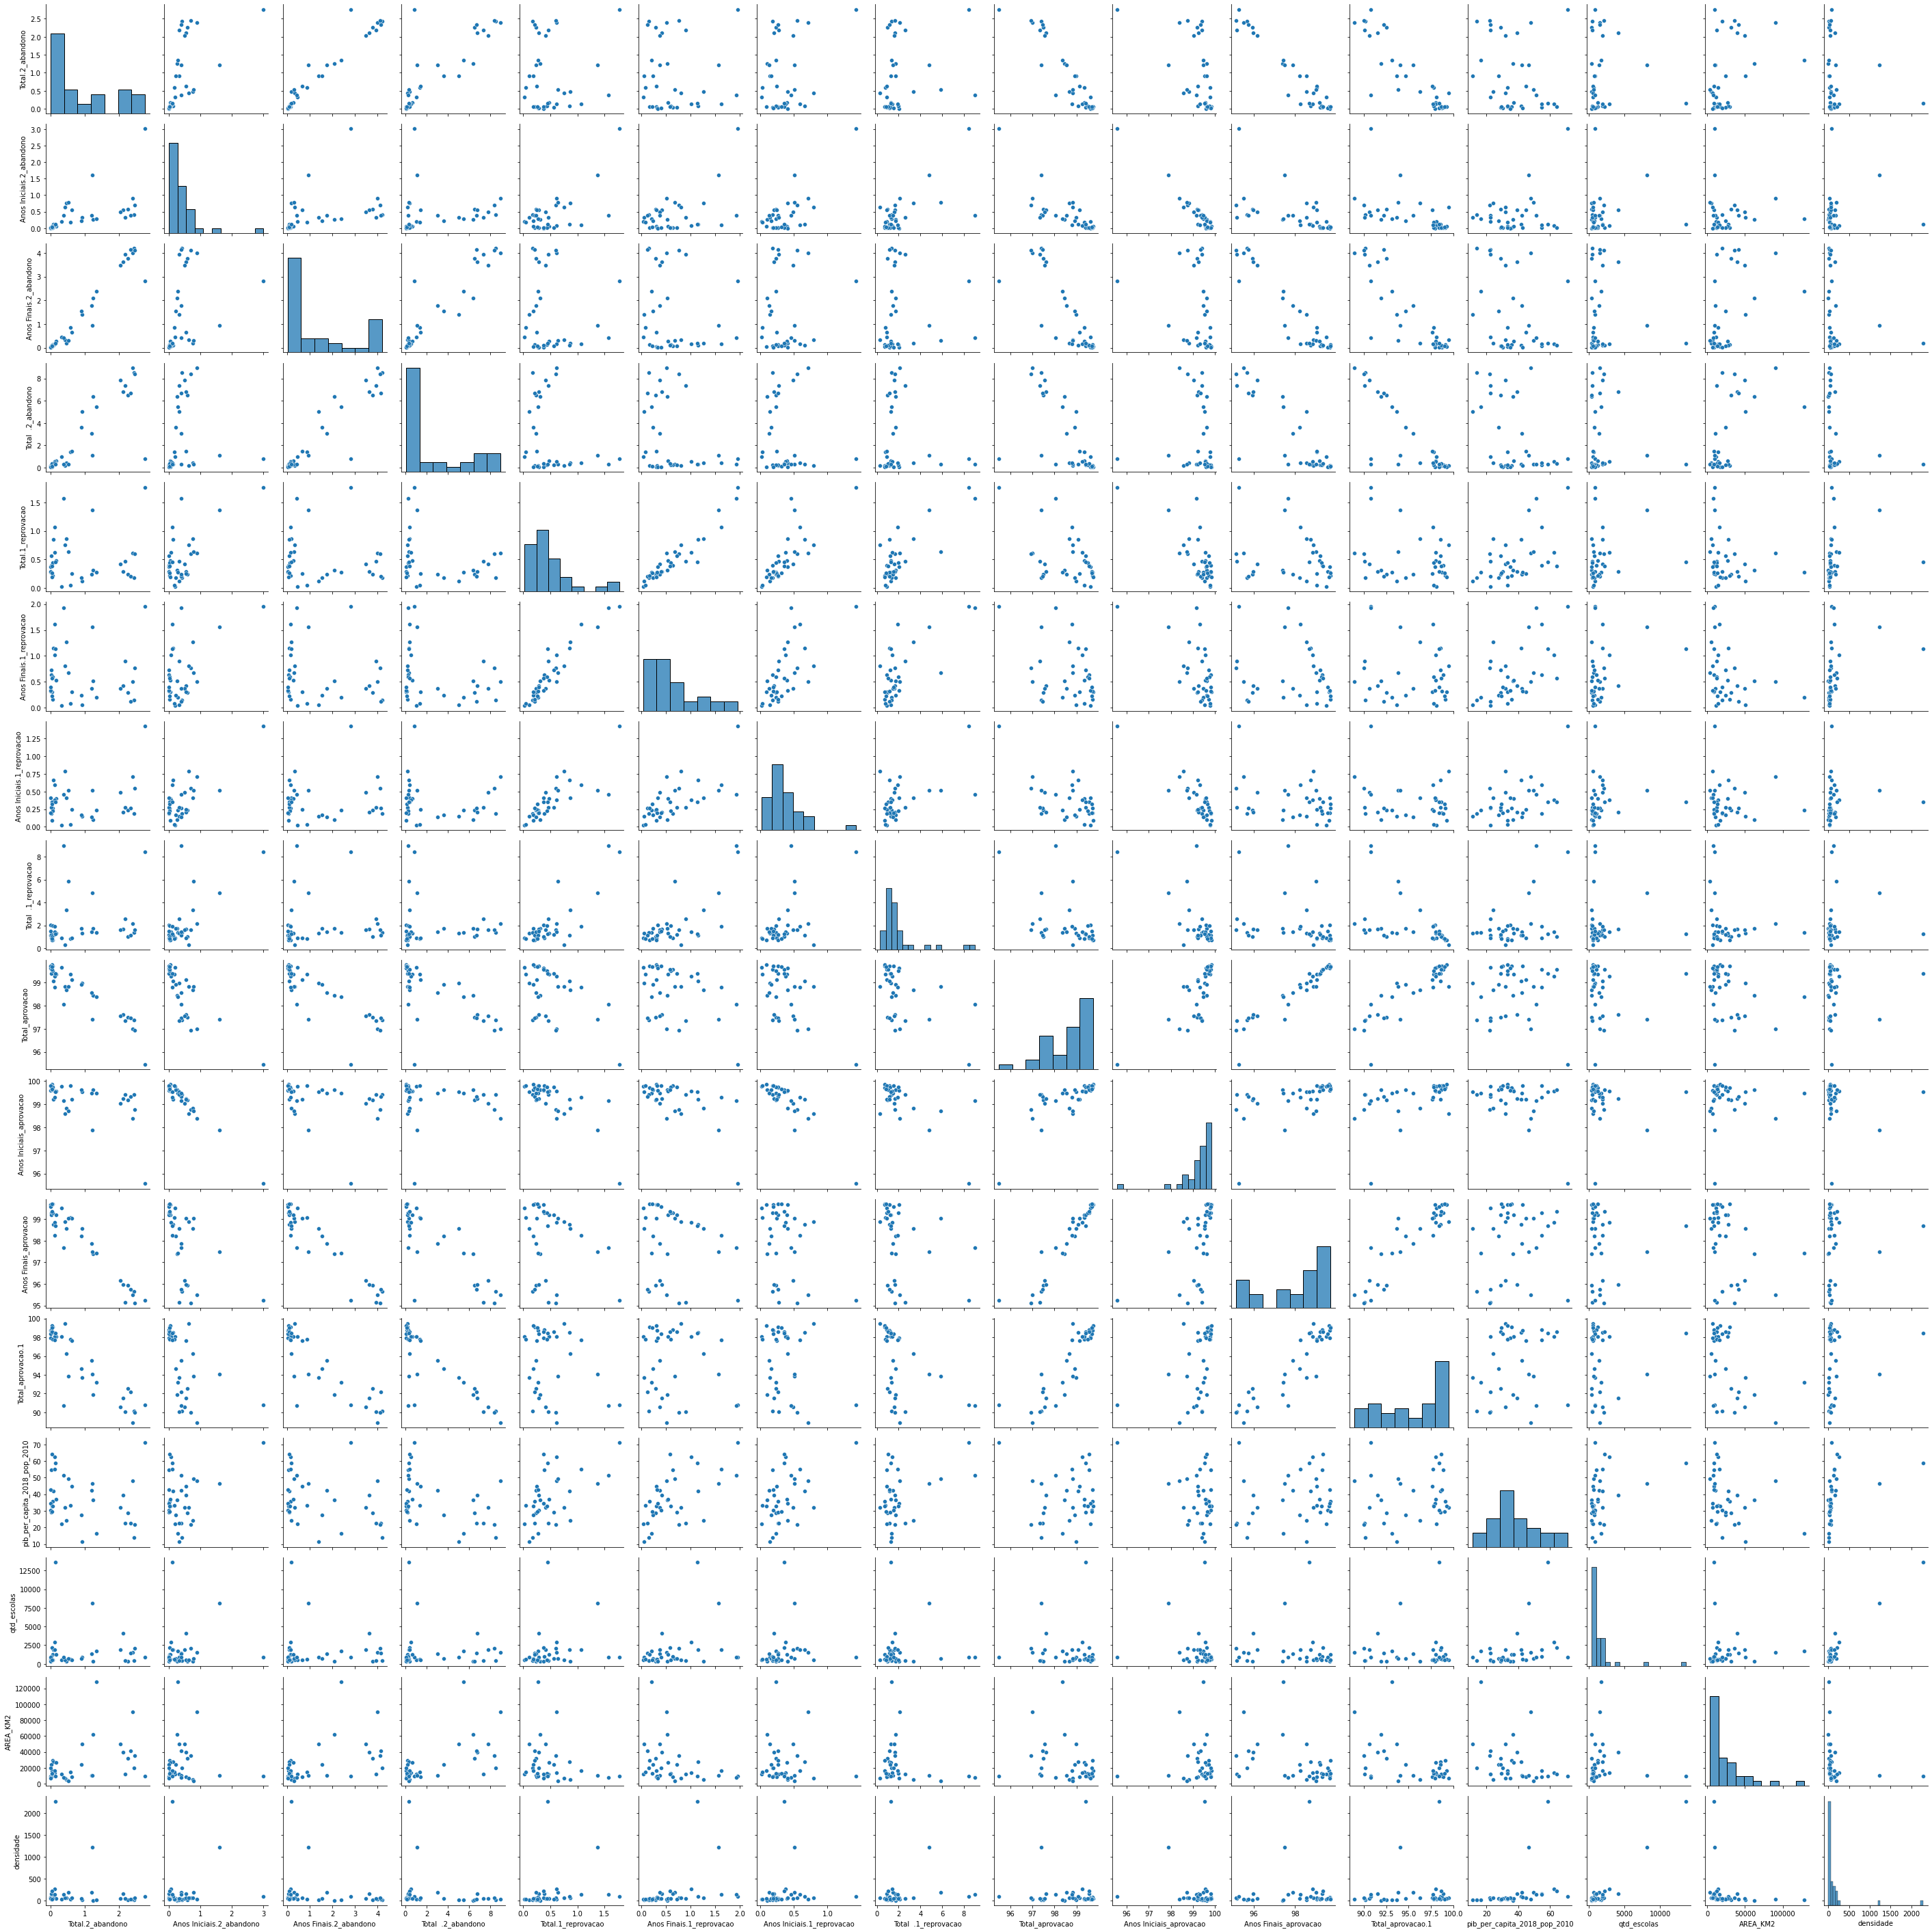

In [ ]:
df = rendimentos_mesorregiao[['Total.2_abandono', 'Anos Iniciais.2_abandono', 'Anos Finais.2_abandono', 'Total  .2_abandono',
                          'Total.1_reprovacao', 'Anos Finais.1_reprovacao', 'Anos Iniciais.1_reprovacao', 'Total  .1_reprovacao',
                          'Total_aprovacao', 'Anos Iniciais_aprovacao',  'Anos Finais_aprovacao', 'Total_aprovacao.1', 'pib_per_capita_2018_pop_2010',
                          'qtd_escolas', 'AREA_KM2', 'densidade']]
sns.pairplot(df)

## Correlação entre quantidade escolas e Rendimento

In [ ]:
meso=mesorregioes_meta.merge(municipios[['mesorregiao_polygon', 'id_mesorregiao', 'gini']].drop_duplicates())

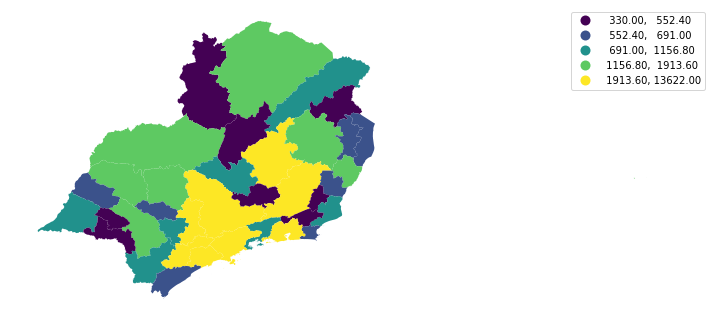

In [ ]:
from shapely import wkt

meso['mesorregiao_polygon'] = meso['mesorregiao_polygon'].apply(wkt.loads)
meso = gpd.GeoDataFrame(meso, geometry='mesorregiao_polygon')
ax = meso.plot(
    column='qtd_escolas', 
    scheme='Quantiles', 
    legend=True, 
    edgecolor='none',
    legend_kwds={'loc': 'best', 'bbox_to_anchor': (1.05, 1)}, 
    figsize=(12, 12)
)
ax.set_axis_off()
plt.show()

In [ ]:
display(rendimentos_mesorregiao['qtd_escolas'].corr(rendimentos_mesorregiao['Total.2_abandono']))
display(rendimentos_mesorregiao['qtd_escolas'].corr(rendimentos_mesorregiao['Total.1_reprovacao']))
display(rendimentos_mesorregiao['qtd_escolas'].corr(rendimentos_mesorregiao['Total_aprovacao']))


-0.023272627031244945

0.18389342113109564

-0.050051986983823835

## Quais indicadores do IBGE correlaciona com o rendimento escolar? PIB? População?



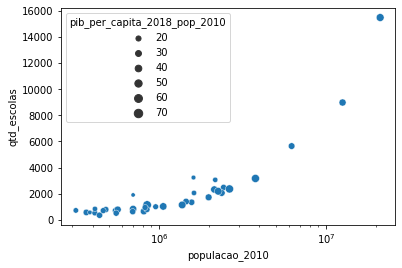

In [ ]:
sns.scatterplot(x='populacao_2010', y='qtd_escolas', size='pib_per_capita_2018_pop_2010', data=mesorregioes_meta)
plt.xscale('log')

In [ ]:
display(mesorregioes_meta['populacao_2010'].corr(mesorregioes_meta['qtd_escolas']))
display(mesorregioes_meta['pib_per_capita_2018_pop_2010'].corr(mesorregioes_meta['qtd_escolas']))
display(mesorregioes_meta['pib'].corr(mesorregioes_meta['qtd_escolas']))

0.9877926787744606

0.3025734564128457

0.968029923948991

## Existe alguma associação entre infraestrutura das escolas e taxa de rendimento escolar?

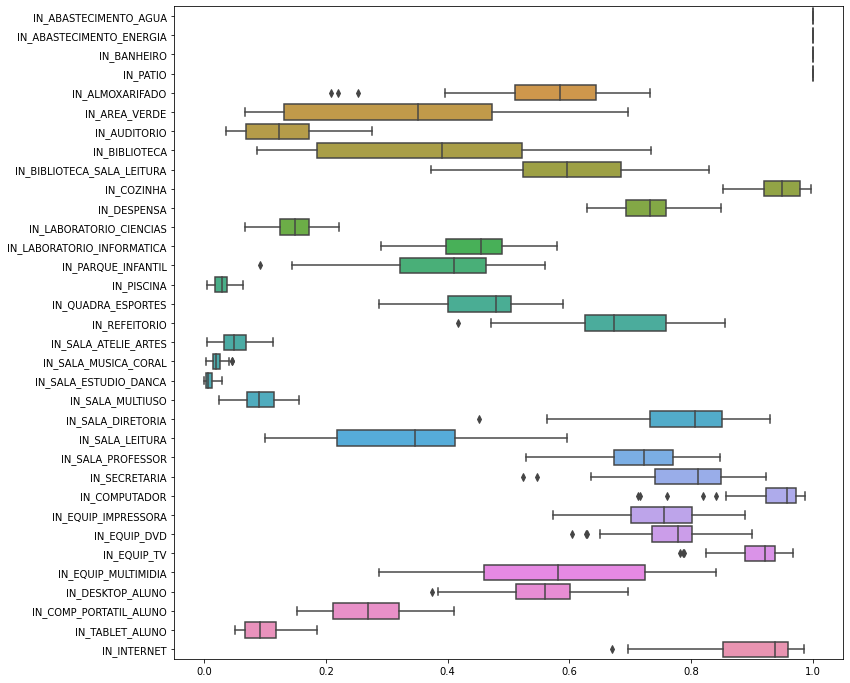

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.boxplot(data=escolas_metrics, orient='h')
fig.savefig('distribuicao_infraestrutura_mesorregiao.png', bbox_inches='tight')

In [ ]:
rendimento_escolas_mesorregiao = rendimentos_mesorregiao.merge(escolas_metrics, left_on='id_mesorregiao', right_on='CO_MESORREGIAO')

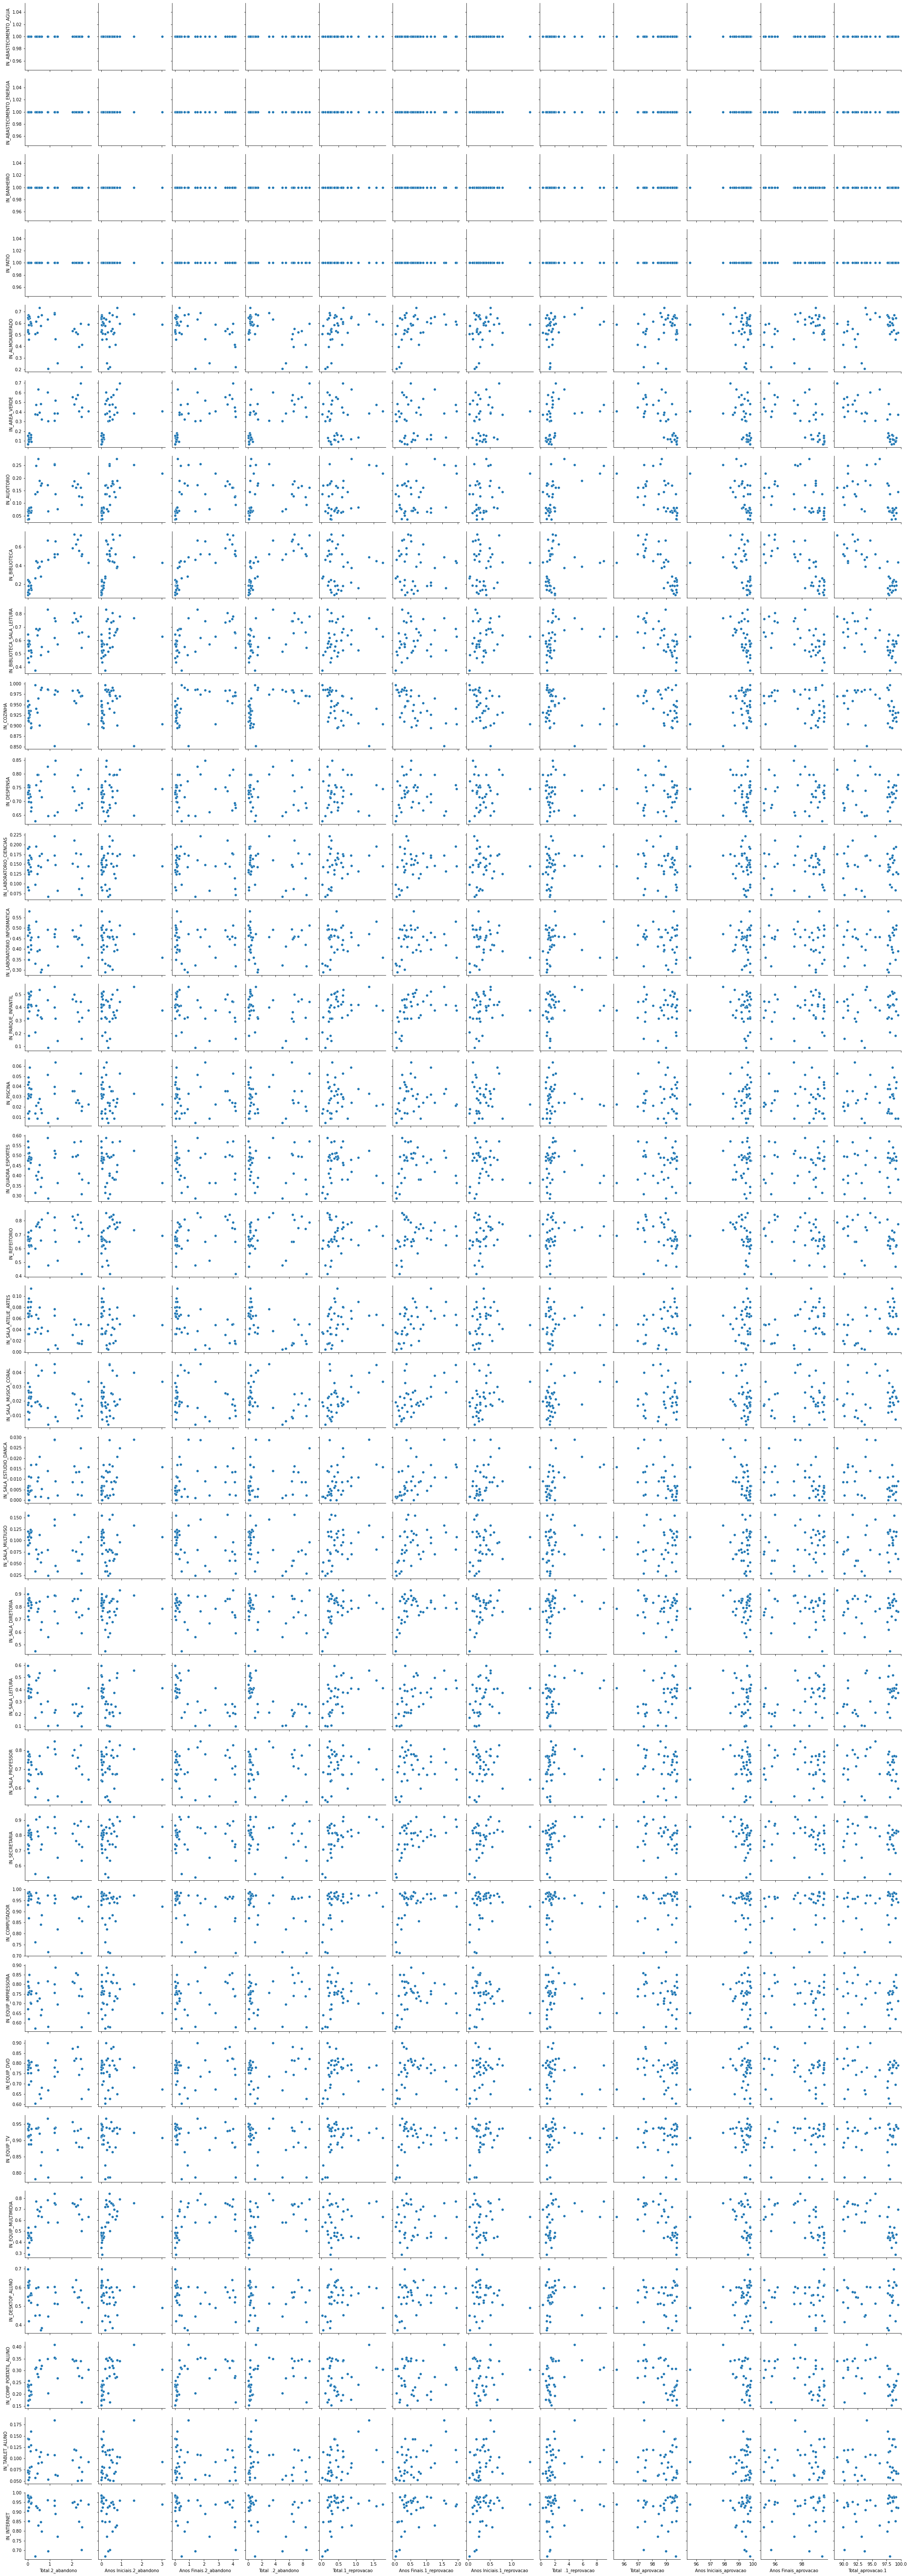

In [ ]:
sns.pairplot(
    rendimento_escolas_mesorregiao,
    x_vars=['Total.2_abandono', 'Anos Iniciais.2_abandono', 'Anos Finais.2_abandono', 'Total  .2_abandono',
                          'Total.1_reprovacao', 'Anos Finais.1_reprovacao', 'Anos Iniciais.1_reprovacao', 'Total  .1_reprovacao',
                          'Total_aprovacao', 'Anos Iniciais_aprovacao',  'Anos Finais_aprovacao', 'Total_aprovacao.1'],
    y_vars=list(escolas_metrics.columns),
)

### Taxa de rendimento por escolas

In [ ]:
rendimento_escolas = pd.read_csv('/content/drive/MyDrive/datasets/CCF425/trabalho/rendimentos/rendimentos_escolas.csv', index_col=0)
rendimento_escolas

,Ano,Região,UF,Código Município,Nome Município,CO_ENTIDADE,NO_ENTIDADE,Localização,Dependência Administrativa,Total_aprovacao,Anos Iniciais_aprovacao,Anos Finais_aprovacao,1º Ano_aprovacao,2º Ano_aprovacao,3º Ano_aprovacao,4º Ano_aprovacao,5º Ano_aprovacao,6º Ano_aprovacao,7º Ano_aprovacao,8º Ano_aprovacao,9º Ano_aprovacao,Total_aprovacao.1,1ª série_aprovacao,2ª série_aprovacao,3ª série_aprovacao,4ª série_aprovacao,Não-Seriado_aprovacao,Total.1_reprovacao,Anos Iniciais.1_reprovacao,Anos Finais.1_reprovacao,1º Ano .1_reprovacao,2º Ano.1_reprovacao,3º Ano.1_reprovacao,4º Ano.1_reprovacao,5º Ano.1_reprovacao,6º Ano.1_reprovacao,7º Ano.1_reprovacao,8º Ano.1_reprovacao,9º Ano.1_reprovacao,Total .1_reprovacao,1ª série.1_reprovacao,2ª série.1_reprovacao,3ª série.1_reprovacao,4ª série.1_reprovacao,Não-Seriado.1_reprovacao,Total.2_abandono,Anos Iniciais.2_abandono,Anos Finais.2_abandono,1º Ano .2_abandono,2º Ano.2_abandono,3º Ano.2_abandono,4º Ano.2_abandono,5º Ano.2_abandono,6º Ano.2_abandono,7º Ano.2_abandono,8º Ano.2_abandono,9º Ano.2_abandono,Total .2_abandono,1ª série.2_abandono,2ª série.2_abandono,3ª série.2_abandono,4ª série.2_abandono,Não-Seriado.2
0,2020,Norte,RO,1100015,Alta Floresta D'Oeste,11022558,EIEEF HAP BITT TUPARI,Rural,Estadual,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,NaN,NaN,100.0,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,Norte,RO,1100015,Alta Floresta D'Oeste,11024291,EMMEF 7 DE SETEMBRO,Rural,Municipal,100.0,100.0,NaN,100.0,100.0,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,Norte,RO,1100015,Alta Floresta D'Oeste,11024372,EMEIEF ANA NERY,Urbana,Municipal,94.9,96.4,93.0,100.0,100.0,92.3,92.9,100.0,87.5,100.0,90.0,92.3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.1,3.6,7.0,0.0,0.0,7.7,7.1,0.0,12.5,0.0,10.0,7.7,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,Norte,RO,1100015,Alta Floresta D'Oeste,11024666,EMEIEF BOA ESPERANCA,Rural,Municipal,99.4,100.0,98.8,100.0,100.0,100.0,100.0,100.0,100.0,100.0,94.7,100.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.6,0.0,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.3,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,Norte,RO,1100015,Alta Floresta D'Oeste,11024682,EEEF EURIDICE LOPES PEDROSO,Urbana,Estadual,99.8,100.0,99.7,NaN,NaN,NaN,NaN,100.0,99.2,100.0,100.0,NaN,99.3,98.0,100.0,100.0,NaN,NaN,0.2,0.0,0.3,NaN,NaN,NaN,NaN,0.0,0.8,0.0,0.0,NaN,0.7,2.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131223,2020,Centro-Oeste,DF,5300108,Brasília,53084012,CE SITIO ENCANTADO,Urbana,Privada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131224,2020,Centro-Oeste,DF,5300108,Brasília,53084020,ESC PEQUENO ENCANTO,Urbana,Privada,98.4,98.4,NaN,100.0,100.0,92.9,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,1.6,NaN,0.0,0.0,7.1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131225,2020,Centro-Oeste,DF,5300108,Brasília,53084039,COL ANCHIETA,Urbana,Privada,99.1,99.3,98.9,100.0,100.0,96.0,100.0,100.0,96.0,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.9,0.7,1.1,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
131226,2020,Centr

In [ ]:
escolas_metrics = escolas[['CO_ENTIDADE']+[agua, energia, banheiro, patio] + infra_columns]
rendimento_escolas = rendimento_escolas[['Localização','Dependência Administrativa', 'CO_ENTIDADE', 'UF', 'Código Município', 'Total_aprovacao', 'Total.1_reprovacao', 'Total.2_abandono']].merge(escolas_metrics, how ='inner')

In [ ]:
rendimento_escolas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36889 entries, 0 to 36888
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Localização                 36889 non-null  object 
 1   Dependência Administrativa  36889 non-null  object 
 2   CO_ENTIDADE                 36889 non-null  int64  
 3   UF                          36889 non-null  object 
 4   Código Município            36889 non-null  int64  
 5   Total_aprovacao             34002 non-null  float64
 6   Total.1_reprovacao          34002 non-null  float64
 7   Total.2_abandono            34002 non-null  float64
 8   IN_ABASTECIMENTO_AGUA       36889 non-null  float64
 9   IN_ABASTECIMENTO_ENERGIA    36889 non-null  float64
 10  IN_BANHEIRO                 36889 non-null  float64
 11  IN_PATIO                    36889 non-null  float64
 12  IN_ALMOXARIFADO             36889 non-null  float64
 13  IN_AREA_VERDE               368

<AxesSubplot:>

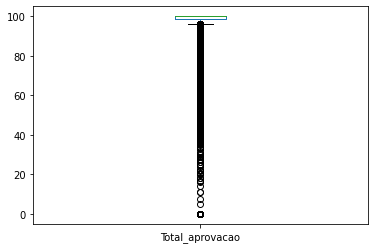

In [ ]:
rendimento_escolas['Total_aprovacao'].plot(kind='box')

In [ ]:
def classificacao_aprovacao(x):
  if x > 99:
    return 'Muito Alto'
  elif x<=99 and x>=80:
    return 'Alto'
  elif x<=80 and x>=60:
    return 'Médio'
  return 'Baixo'

rendimento_escolas['aprovacao_classes'] = rendimento_escolas['Total_aprovacao'].apply(lambda x: classificacao_aprovacao(x))

<AxesSubplot:>

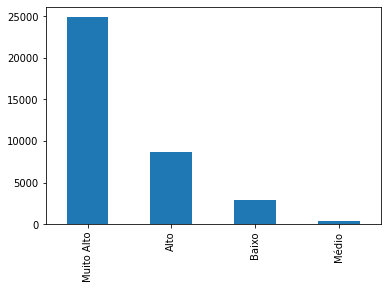

In [ ]:
rendimento_escolas['aprovacao_classes'].value_counts().plot(kind='bar')

In [ ]:
partA = (rendimento_escolas[[agua, energia, banheiro, patio] + infra_columns+['aprovacao_classes']].groupby('aprovacao_classes').sum()/rendimento_escolas[[agua, energia, banheiro, patio] + infra_columns+['aprovacao_classes']].groupby('aprovacao_classes').count())

In [ ]:
partB = rendimento_escolas[[agua, energia, banheiro, patio] + infra_columns].sum()/len(rendimento_escolas)

In [ ]:
lift = (((partA/partB)-1)*100).T

In [ ]:
lift

aprovacao_classes,Alto,Baixo,Muito Alto,Médio
IN_ABASTECIMENTO_AGUA,0.000000,0.000000,0.000000,0.000000
IN_ABASTECIMENTO_ENERGIA,0.000000,0.000000,0.000000,0.000000
IN_BANHEIRO,0.000000,0.000000,0.000000,0.000000
IN_PATIO,0.000000,0.000000,0.000000,0.000000
IN_ALMOXARIFADO,0.795690,12.197323,-1.630088,-6.274541
IN_AREA_VERDE,10.457990,21.015920,-6.626571,31.785227
IN_AUDITORIO,1.576616,108.407947,-13.841742,26.510871
IN_BIBLIOTECA,24.587897,30.609143,-12.835611,41.624605
IN_BIBLIOTECA_SALA_LEITURA,7.017074,14.971810,-4.301860,5.219080
IN_COZINHA,-3.609968,-6.082379,2.172400,-12.550697


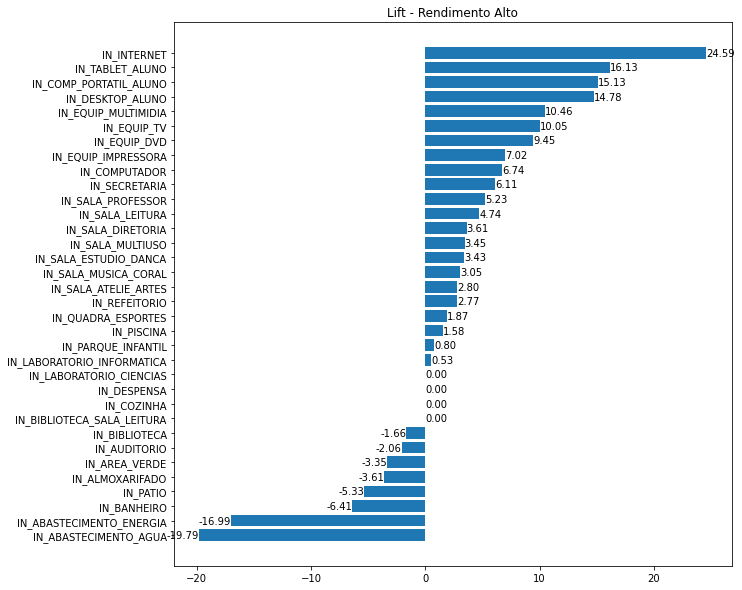

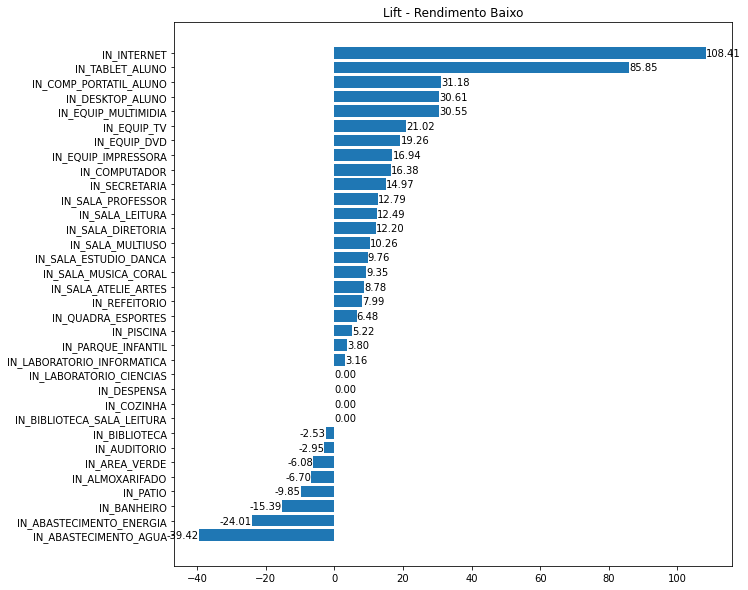

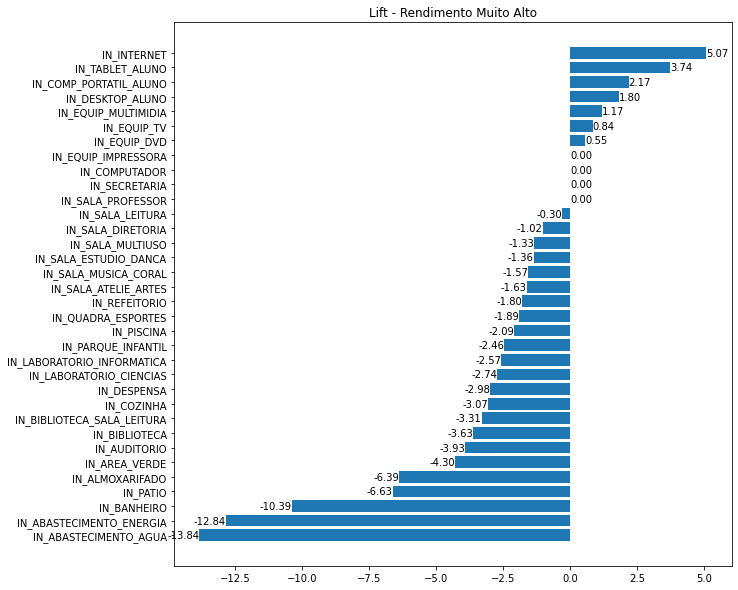

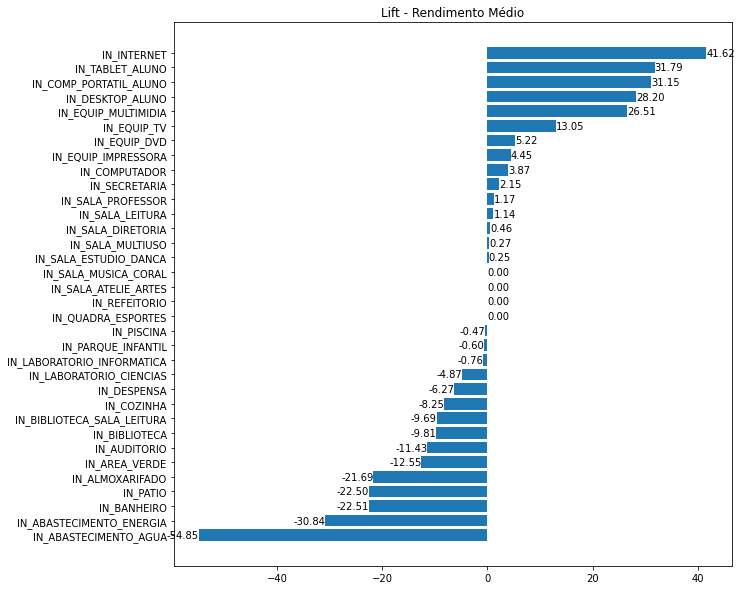

In [ ]:
for x in lift.columns.tolist():
  
  fig, ax = plt.subplots(figsize=(10,10))
  hbars=ax.barh(np.arange(len(lift.index.tolist())), lift[x].sort_values(ascending=True),align='center')
  ax.set_title('Lift - Rendimento ' + x)
  ax.set_yticks(np.arange(len(lift.index.tolist())))
  ax.set_yticklabels(lift.index.tolist())
  ax.bar_label(hbars, fmt='%.2f')
  fig.savefig('Lift-Rendimento-'+x, bbox_inches='tight')
  plt.show()

In [ ]:
pd.crosstab(rendimento_escolas['aprovacao_classes'], rendimento_escolas['Dependência Administrativa'])

Dependência Administrativa,Estadual,Federal,Municipal,Privada
aprovacao_classes,,,,
Alto,2870,4,2506,3281
Baixo,1717,168,51,1022
Muito Alto,5736,6,13489,5656
Médio,134,0,76,173


In [ ]:
partA = (rendimento_escolas[[agua, energia, banheiro, patio] + infra_columns+['Dependência Administrativa']].groupby('Dependência Administrativa').sum()/rendimento_escolas[[agua, energia, banheiro, patio] + infra_columns+['Dependência Administrativa']].groupby('Dependência Administrativa').count())
partB = rendimento_escolas[[agua, energia, banheiro, patio] + infra_columns].sum()/len(rendimento_escolas)
lift = (((partA/partB)-1)*100).T

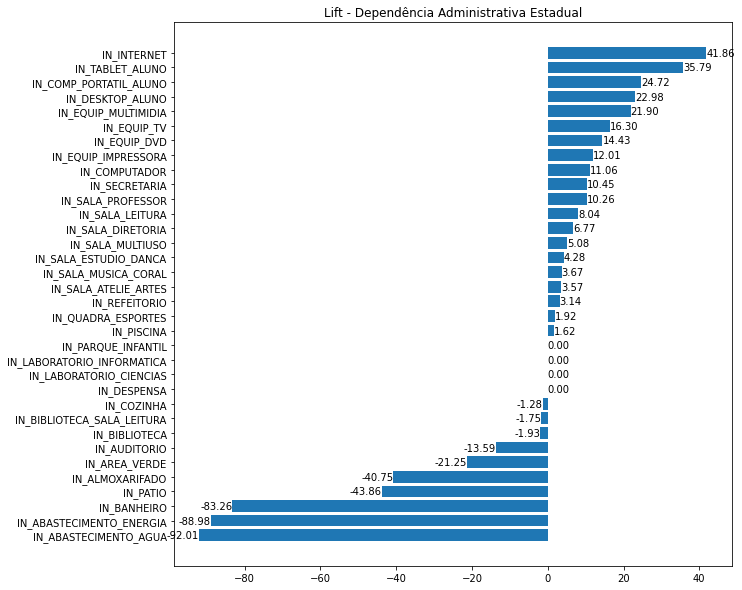

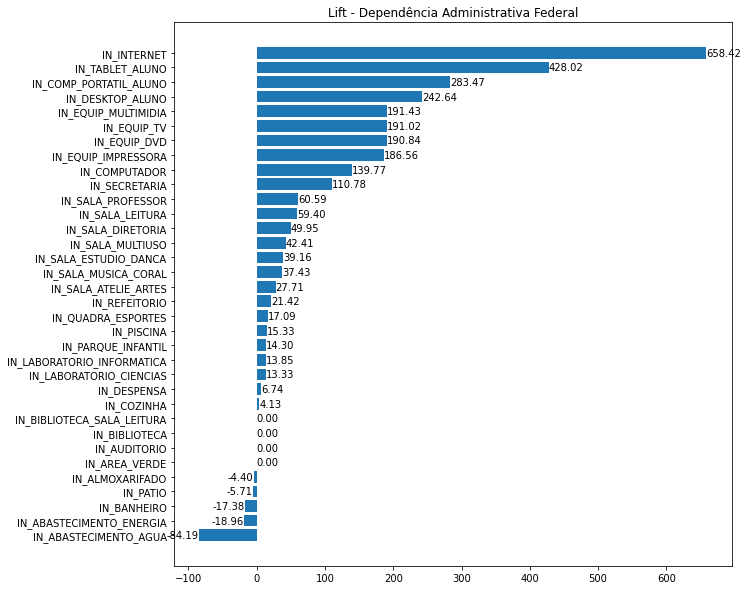

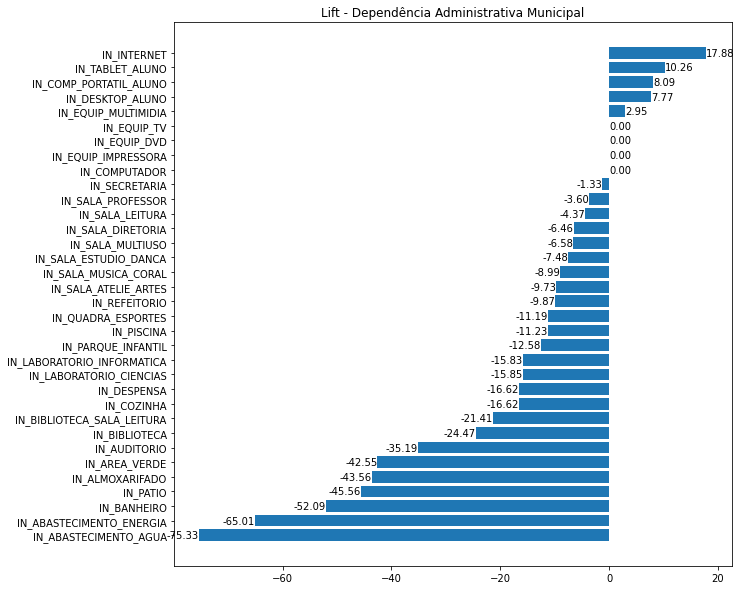

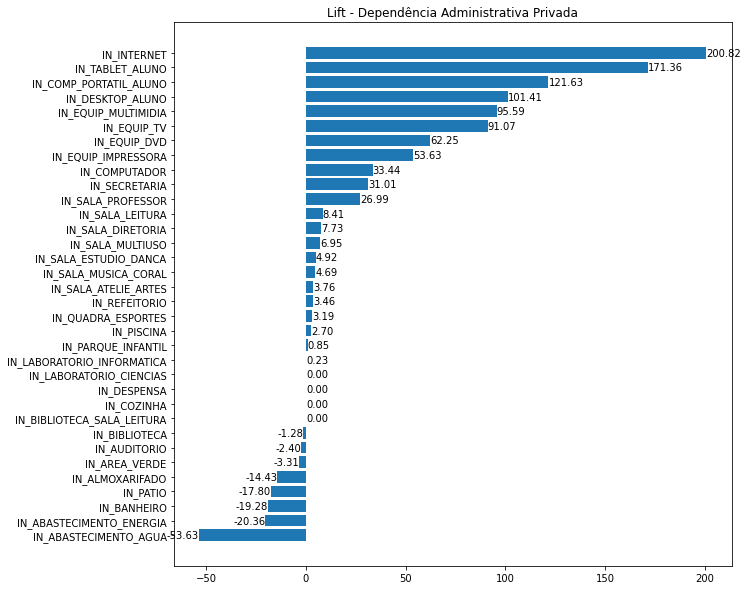

In [ ]:
for x in lift.columns.tolist():
  
  fig, ax = plt.subplots(figsize=(10,10))
  hbars=ax.barh(np.arange(len(lift.index.tolist())), lift[x].sort_values(ascending=True),align='center')
  ax.set_title('Lift - Dependência Administrativa ' + x)
  ax.set_yticks(np.arange(len(lift.index.tolist())))
  ax.set_yticklabels(lift.index.tolist())
  ax.bar_label(hbars, fmt='%.2f')
  fig.savefig('Lift-DependenciaAdministrativa-'+x, bbox_inches='tight')
  plt.show()

## Avaliar Índice GINI por região, existe correlação com a taxa de rendimento escolar?

In [ ]:
rendimentos_mesorregiao = rendimentos_mesorregiao.merge(municipios[['mesorregiao_polygon', 'id_mesorregiao', 'gini']].drop_duplicates())

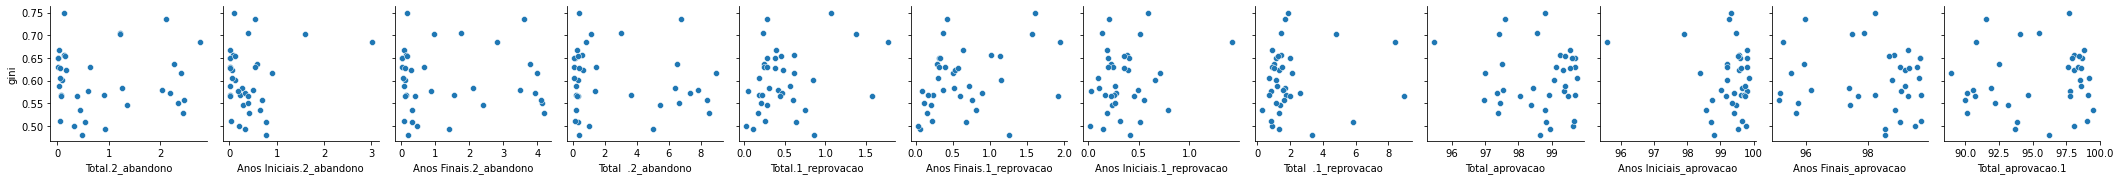

In [ ]:
sns.pairplot(
    rendimentos_mesorregiao,
    x_vars=['Total.2_abandono', 'Anos Iniciais.2_abandono', 'Anos Finais.2_abandono', 'Total  .2_abandono',
                          'Total.1_reprovacao', 'Anos Finais.1_reprovacao', 'Anos Iniciais.1_reprovacao', 'Total  .1_reprovacao',
                          'Total_aprovacao', 'Anos Iniciais_aprovacao',  'Anos Finais_aprovacao', 'Total_aprovacao.1'],
    y_vars=["gini"],
)

<AxesSubplot:>

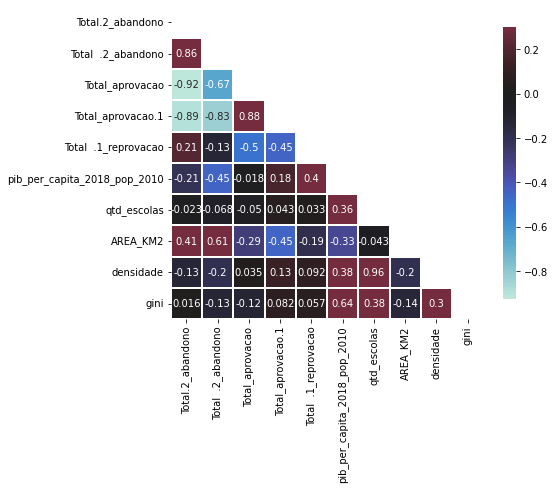

In [ ]:
corr = rendimentos_mesorregiao[['Total.2_abandono', 'Total  .2_abandono', 'Total_aprovacao', 'Total_aprovacao.1', 
                                'Total  .1_reprovacao', 'pib_per_capita_2018_pop_2010',
                                'qtd_escolas', 'AREA_KM2', 'densidade', 'gini']].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(7, 10))

sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.2, annot=True, cbar_kws={"shrink": .5})